# 逐段三次样条 ($\mathbb{S}_3^2$ Splne)

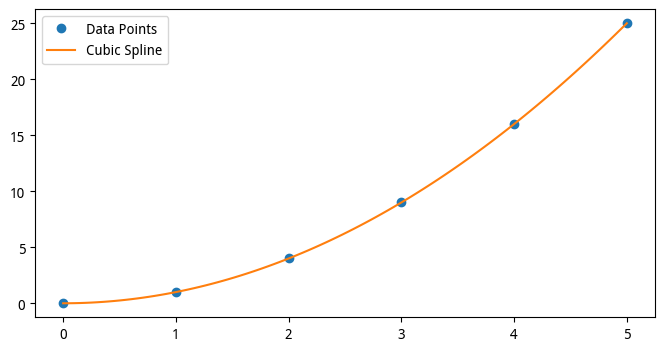

In [1]:
import numpy as np  
from scipy.interpolate import CubicSpline  
import matplotlib.pyplot as plt  
  
# 准备数据点  
x = np.array([0, 1, 2, 3, 4, 5])  
y = np.array([0, 1, 4, 9, 16, 25])  
  
# 创建逐段三次样条对象  
cs = CubicSpline(x, y)  
  
# 生成用于评估样条的细粒度x值  
x_new = np.linspace(0, 5, 100)  
  
# 评估样条  
y_new = cs(x_new)  
  
# 绘制结果  
plt.figure(figsize=(8, 4))  
plt.plot(x, y, 'o', label='Data Points')  
plt.plot(x_new, y_new, label='Cubic Spline')  
plt.legend()  
plt.show()  

In [2]:
def Runge(x):
    return 1.0 / (1.0 + x**2)

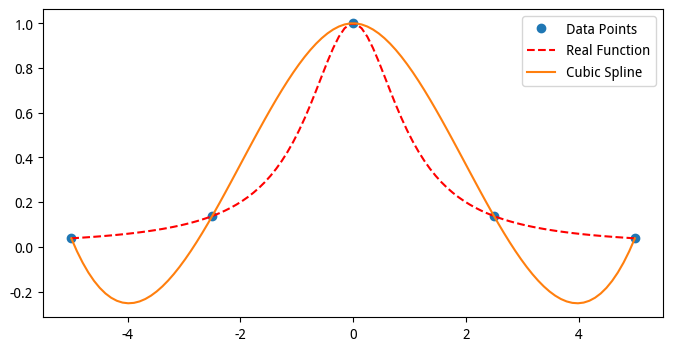

In [3]:
# 准备数据点  
n = 5
x = np.linspace(-5, 5, n)
y = Runge(x)
  
# 创建逐段三次样条对象  
cs = CubicSpline(x, y)  
  
# 生成用于评估样条的细粒度x值  
x_new = np.linspace(-5, 5, 100)  
  
# 评估样条  
y_new = cs(x_new)

# 真解
y_real = Runge(x_new)
  
# 绘制结果  
plt.figure(figsize=(8, 4))  
plt.plot(x, y, 'o', label='Data Points')  
plt.plot(x_new, y_real, 'r--', label='Real Function')  
plt.plot(x_new, y_new, label='Cubic Spline')  
plt.legend()  
plt.show()  

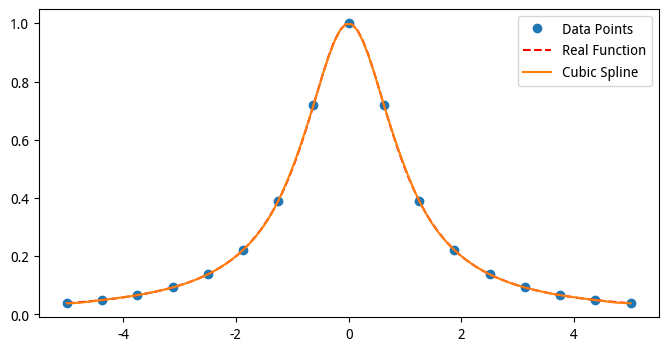

In [4]:
# 准备数据点  
n = 17
x = np.linspace(-5, 5, n)
y = Runge(x)
  
# D1 边界条件
start_derivative = 10.0 / 26.0**2 
end_derivative = -start_derivative

# 创建逐段三次样条对象  
cs = CubicSpline(x, y, bc_type=('clamped'))  
  
# 生成用于评估样条的细粒度x值  
x_new = np.linspace(-5, 5, 100)  
  
# 评估样条  
y_new = cs(x_new)

# 真解
y_real = Runge(x_new)

  
# 绘制结果  
plt.figure(figsize=(8, 4))  
plt.plot(x, y, 'o', label='Data Points')  
plt.plot(x_new, y_real, 'r--', label='Real Function')  
plt.plot(x_new, y_new, label='Cubic Spline')  
plt.legend()  
plt.show() 
# 指定起点和终点的导数  


# B-Spline

现在我们严格按照讲义定义做一些测试, 先构建 B-样条基函数 :

In [5]:
?CubicSpline

Init signature: CubicSpline(x, y, axis=0, bc_type='not-a-knot', extrapolate=None)
Docstring:     
Cubic spline data interpolator.

Interpolate data with a piecewise cubic polynomial which is twice
continuously differentiable [1]_. The result is represented as a `PPoly`
instance with breakpoints matching the given data.

Parameters
----------
x : array_like, shape (n,)
    1-D array containing values of the independent variable.
    Values must be real, finite and in strictly increasing order.
y : array_like
    Array containing values of the dependent variable. It can have
    arbitrary number of dimensions, but the length along ``axis``
    (see below) must match the length of ``x``. Values must be finite.
axis : int, optional
    Axis along which `y` is assumed to be varying. Meaning that for
    ``x[i]`` the corresponding values are ``np.take(y, i, axis=axis)``.
    Default is 0.
bc_type : string or 2-tuple, optional
    Boundary condition type. Two additional equations, given by th

In [ ]:
def Bspline(n, i, x):
    if (n == 0):
        return (x > i - 1) * (x <= i) * 1.0
    else:
        return (x - i + 1) / n * Bspline(n - 1, i, x) + (i + n - x) / n * Bspline(n - 1, i + 1, x)

In [ ]:
x = np.linspace(0, 10, 1000)
Z = np.linspace(0, 10, 11)

$B_i^0$ 是支撑在 $(t_{i - 1}, t_i)$ 上的：

In [ ]:
n = 0
plt.plot(Z, np.zeros(len(Z)), 'o')
i = 1
plt.plot(x, Bspline(n, 1, x), label=f'$B_{i}^{n}$')
i = 5
plt.plot(x, Bspline(n, 5, x), label=f'$B_{i}^{n}$')
plt.legend()  

所以考虑一下为什么说
$$
\sum_{i = -\infty}^{\infty} B_i^0 = 1.
$$
以及这个无穷求和的实际意义。然后 $B_i^1$ 是支撑在 $(t_{i - 1}, t_{i + 1})$ 上的：

In [ ]:
n = 1
plt.plot(Z, np.zeros(len(Z)), 'o')
i = 1
plt.plot(x, Bspline(n, 1, x), label=f'$B_{i}^{n}$')
i = 2
plt.plot(x, Bspline(n, 2, x), label=f'$B_{i}^{n}$')
plt.plot(x, Bspline(n, 1, x) + Bspline(n, 2, x), label=f'$B_{i}^{n}$')
plt.legend()  

$B_i^2$ 是支撑在 $(t_{i - 1}, t_{i + 2})$ 上的：

In [ ]:
n = 2
plt.plot(Z, np.zeros(len(Z)), 'o')
i = 1
plt.plot(x, Bspline(n, 1, x), label=f'$B_{i}^{n}$')
i = 2
plt.plot(x, Bspline(n, i, x), label=f'$B_{i}^{n}$')
i = 3
plt.plot(x, Bspline(n, i, x), label=f'$B_{i}^{n}$')
i = 4
plt.plot(x, Bspline(n, i, x), label=f'$B_{i}^{n}$')
plt.plot(x, Bspline(n, 1, x)+Bspline(n, 2, x)+Bspline(n, 3, x), label=f'$B_{i}^{n}$')
plt.legend()  

现在我们可以考虑一下，$B_i^n$ 是支撑在 $(t_{i - 1}, t_{i + n})$ 上的：

In [ ]:
n = 5
plt.plot(Z, np.zeros(len(Z)), 'o')
i = 1
plt.plot(x, Bspline(n, 1, x), label=f'$B_{i}^{n}$')
i = 5
plt.plot(x, Bspline(n, 5, x), label=f'$B_{i}^{n}$')
plt.legend()  

以及推论 3.52 含义，内部的基是对称的。比如这里我们看到基确实都是对称的。

In [ ]:
plt.plot(Z, np.zeros(len(Z)), 'o')
i = 1
plt.plot(x, Bspline(n, 1, x), label=f'$B_{i}^{n}(x)$')
plt.plot(x, Bspline(n, 1, n + 1 - x), '--',label=f'$B_{i}^{n}(2\\cdot{i} + {n} - 1 - x)$')
plt.legend()  

在边界上，支撑会不同，因此失去对称性。想想 $B_i^1$ 在 $\mathbb{S}_1^0$ 中的情况。现在我们可以验证例 3.53.

In [ ]:
n = 2
plt.plot(Z, np.zeros(len(Z)), 'o')
i = 1
plt.plot(x, Bspline(n, 1, x), label=f'$B_{i}^{n}$')
plt.plot(1, 0.5, 'o')
plt.plot(2, 0.5, 'o')
plt.plot(1.5, 3/4, 'o')
i = 5
plt.plot(x, Bspline(n, 5, x), label=f'$B_{i}^{n}$')
plt.legend()  

现在我们可以验证例 3.54.

In [ ]:
n = 3
plt.plot(Z, np.zeros(len(Z)), 'o')
i = 1
plt.plot(x, Bspline(n, 1, x), label=f'$B_{i}^{n}$')
plt.plot(1, 1/6, 'o')
plt.plot(2, 2/3, 'o')
plt.plot(3, 1/6, 'o')  # 推论 3.52 
i = 5
plt.plot(x, Bspline(n, 5, x), label=f'$B_{i}^{n}$')
plt.legend()  

下面拼装一下 S32 样条。参照课本定理 3.57，在节点 $1, 2, \ldots, 10$ 上拼装。

In [ ]:
# 目标函数
def func(x):
    return np.sin(x)

# 导数
def dfunc(x):
    return np.cos(x)

# 节点数
N = 10

# 构建三对角矩阵 M
U = np.diag(np.ones(N - 1), 1)
D = np.ones(N) * 4
D[0] = D[-1] = 2
L = np.transpose(U)
M = np.diag(D) + U + L

# 构建右端项 b
b = [func(i) * 6 for i in range(1, N + 1, 1)]

# 应用边界条件 D1
b[0] = 3 * func(1) + dfunc(1)
b[-1] = 3 * func(10) - dfunc(10)

# 解出内部基组合系数 a
a = np.linalg.solve(M,b)

# 补上边界系数
s = np.zeros(len(a) + 2)
s[1:-1] = a
s[0] = s[2] - 2 * dfunc(1)
s[-1] = s[-3] + 2 * dfunc(10)

# 拼装样条，低效！
def S32(x):
    S = 0
    for i in range(-1,11):
        S = S + s[i + 1] * Bspline(3, i, x)
    return S

# 绘制拟合结果
plt.plot(x, S32(x), x, func(x), 'r--')
# plt.plot(range(0,11,1),np.zeros(11), 'o')
t = range(1,11,1)
plt.plot(t, func(t), 'o')

注意标出了拟合节点。

# $\mathbb{S}_3^2$ 基数 B 样条的推导过程

我们希望
$$
S(x) = \sum_{i=-\infty}^\infty a_i B_{i, \mathbb{Z}}^3(x),
$$
满足 $f(i) = S(i)$, 这里 $i$ 是一组整数点。为直观，我们不妨设 $i = 1, 2, 3, 4$. 

注意到 $ B_{i, \mathbb{Z}}^3(x) $ 的支撑情况，在 $ x = i $ 点附近，总是只有 $3$ 个基函数会对 $f(i)$ 造成影响，比如在 $x = i = 3$ 附近，非零的基函数只有$B_{1, \mathbb{Z}}^3(x)$, $B_{2, \mathbb{Z}}^3(x)$ 和 $B_{3, \mathbb{Z}}^3(x)$. 因此实际上只有
$$
f(i) = S(i) =  \sum_{k = i - 2}^i a_k B_{k, \mathbb{Z}}^3(x),
$$
下图，是 $i = 3$ 的支撑基函数。

In [ ]:
n = 3
plt.plot(Z, np.zeros(len(Z)), 'o')
i = 1
plt.plot(x, Bspline(n, i, x), label=f'$B_{i}^{n}$')
plt.plot(1, 1/6, 'o')
plt.plot(2, 2/3, 'o')
plt.plot(3, 1/6, 'o')  # 推论 3.52 
i = 2
plt.plot(x, Bspline(n, i, x), label=f'$B_{i}^{n}$')
plt.plot(1, 1/6, 'o')
plt.plot(2, 2/3, 'o')
plt.plot(3, 1/6, 'o')  # 推论 3.52 
i = 3
plt.plot(x, Bspline(n, i, x), label=f'$B_{i}^{n}$')
plt.plot(1, 1/6, 'o')
plt.plot(2, 2/3, 'o')
plt.plot(3, 1/6, 'o')  # 推论 3.52
plt.plot(3, 0, 'ro', label='$x = 3$')
plt.legend()  
plt.title('The non-zero basis around $x = 3$')

而对一组连续的样条节点，$1, 2, \cdots, N$, 则有
$$
S(x) = \sum_{i=-\infty}^\infty a_i B_{i, \mathbb{Z}}^3(x) = \sum_{i=-1}^N a_i B_{i, \mathbb{Z}}^3(x), \tag{3.71},
$$
个无穷求和真的只是一个记号而已。在我们具体的例子中，
$$
S(x) = a_{-1} B_{-1, \mathbb{Z}}^3(x) + \cdots + a_{4} B_{4, \mathbb{Z}}^3(x).
$$
我们把所有相关的基函数都画出来：

In [ ]:
x = np.linspace(-2, 10, 1000)
Z = np.linspace(-2, 10, 13)
n = 3
plt.plot(Z, np.zeros(len(Z)), 'o')
plt.plot(Z[3:7], np.zeros(4), 'ro', label='knots')

for i in range(-1, 5):
    plt.plot(x, Bspline(n, i, x), label=f'$B_{i}^{n}$')
plt.legend()  
plt.title('The basis for $i = 1, 2, 3, 4.$')

对内部点 $x = i = 2$, 有
$$
f(2) = S(2) = a_0 B_{0, \mathbb{Z}}^3(2) + a_1 B_{1, \mathbb{Z}}^3(2) + a_2 B_{0, \mathbb{Z}}^3(2),
$$
而
$$
B_{0, \mathbb{Z}}^3(2) = \frac16, B_{1, \mathbb{Z}}^3(2) = \frac23, B_{2, \mathbb{Z}}^3(2) = \frac16,  
$$
因此确定一个方程：
$$
f(2) = \frac16 a_0  + \frac32 a_1 + \frac16 a_2 \Rightarrow a_0  + 4 a_1 + a_2 = 6 f(2).
$$
一般地，对内部节点：
$$
a_{i - 2}  + 4 a_{i - 1} + a_i = 6 f(i)， i = 2, 3, \cdots, N - 1.
$$
这就是课本定理 3.57 的矩阵 $M$ 和右端向量 $b$ 的第 $2$ 到 $N - 1$ 行。

而在边上，有边界条件 $f'(1)$, 注意
$$
f(1) = S(1) = a_{-1} B_{-1, \mathbb{Z}}^3(1) + a_0 B_{0, \mathbb{Z}}^3(1) + a_1 B_{1, \mathbb{Z}}^3(1),
$$
由
$$ 
\frac{d}{dx} B_{i, \mathbb{Z}}^n(x) = B_{i, \mathbb{Z}}^{n-1}(x) - B_{i+1, \mathbb{Z}}^{n-1}(x). \tag{3.74}
$$
得
$$
f'(1) = a_{-1} \frac{d}{dx} B_{-1, \mathbb{Z}}^3(1) + a_0 \frac{d}{dx} B_{0, \mathbb{Z}}^3(1) + a_1 \frac{d}{dx} B_{1, \mathbb{Z}}^3(1).
$$
其中
$$
\frac{d}{dx} B_{-1, \mathbb{Z}}^3(1) = B_{-1, \mathbb{Z}}^2(1) - B_{0, \mathbb{Z}}^2(1) = 0 - \frac12 = -\frac12,
$$
因为 $B_{i, \mathbb{Z}}^2(x)$ 的支撑集是 $(i - 1, i + 2)$. 同理
$$
\begin{array}{rcl}
\frac{d}{dx} B_{0, \mathbb{Z}}^3(1) &=& B_{0, \mathbb{Z}}^2(1) + B_{1, \mathbb{Z}}^2(1) = \frac12 - \frac12 = 0,\\
\frac{d}{dx} B_{1, \mathbb{Z}}^3(1) &=& B_{1, \mathbb{Z}}^2(1) + B_{2, \mathbb{Z}}^2(1) = \frac12 - 0 = \frac12.
\end{array}
$$
故
$$
f'(1) = -\frac{1}{2}a_{-1} + \frac{1}{2}a_1 \Rightarrow a_{-1} = a_1 - 2 f'(1).
$$
即课本 (3.72) 前一公式. 后一公式类似. 再将此公式加到
$$
a_{-1}  + 4 a_{0} + a_1 = 6 f(1),
$$
即得
$$
2 a_{0}  + a_1 = 3 f(1) + f'(1),
$$
就是矩阵 $M$ 的第一行，最后一行类似可得。由此我们演示了完整的定理 3.57 的拼装过程。

以上过程是一个一般性过程。但定理 3.58 显示了一些灵活的变通。它是将同样的思路用于 $\mathbb{S}_2^1$. 这里有一个问题，
就是用于拼装的基函数是偶数个：
$$
f(i) = S(i) =  a_{i - 1} B_{i - 1, \mathbb{Z}}^2(x) + a_{i} B_{i, \mathbb{Z}}^2(x),
$$


In [ ]:
n = 2
plt.plot(Z, np.zeros(len(Z)), 'o')
i = 2
plt.plot(x, Bspline(n, i, x), label=f'$B_{i}^{n}$')
i = 3
plt.plot(x, Bspline(n, i, x), label=f'$B_{i}^{n}$')
plt.plot(3, 0, 'ro', label='$x = 3$')
plt.legend()  
plt.title('The non-zero basis around $x = 3$')

这里夹带点私货, 把我们接下去需要的三对角方程组求解器准备好, 也就是追赶法, 国外叫 Thomas 算法: 

In [ ]:
def Thomas(La, Mb, Uc, Rd):
    # https://www.jianshu.com/p/ef2027568912
    n=len(Mb)
    c=np.zeros(n-1)
    d=np.zeros(n)
    c[0]=Uc[0]/Mb[0]
    for i in range(1,n-1):
        c[i]=Uc[i]/(Mb[i]-c[i-1]*La[i-1])
    d[0]=Uc[0]/Mb[0]
    for i in range(1,n):
        d[i]=(Rd[i]-(d[i-1]*La[i-1]))/(Mb[i]-c[i-1]*La[i-1])
    ls=list(range(n-1))[::-1]
    x=np.zeros(n)
    x[n-1]=d[n-1]
    for i in ls:
        x[i]=d[i]-c[i]*x[i+1]
    return(x)

注意我这里每一次的 $B_{i, \mathbb{Z}}^n$ 都重算了, 实际工作中, 可以算好存在那里. 一个问题是, 为什么我们的型值点是分布在 $[1, 15]$, 但是准确的拟合是 $[3, 15]$? 是有 bug 么?

**本程序仅供演示和理解算法使用, 严禁用于实际计算工作.**